# Task 2: Bayesian Change Point Analysis

In [51]:
# import necessary libraries
import sys
import os
import pandas as pd
from glob import glob

In [52]:
from pathlib import Path
from importlib import reload
# add the project root to the path
project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

#### Data Loading

In [53]:
# Loading the module
from src.DataLoader import DataLoader
import src.DataLoader
reload(src.DataLoader)

<module 'src.DataLoader' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/DataLoader.py'>

In [54]:
# data path
oil_data_path ="../data/BrentOilPrices.csv"
event_data_path = "../data/event.csv"

In [55]:
# initialize the DataLoader
oil_data_loader = DataLoader(oil_data_path)
event_data_loader = DataLoader(event_data_path)
# load the data
oil_data = oil_data_loader.load_data()
event_data = event_data_loader.load_data()

Data loaded successfully.
Data loaded successfully.


In [56]:
display(oil_data.head())
display(event_data.head())

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


,Event,Start_Date,End_Date,Description,Reference
0,Gulf War (Iraq-Kuwait Crisis),1990-08-02,1991-02-28,Iraqi invasion of Kuwait caused supply fears; ...,EIA
1,Asian Financial Crisis,1997-07-02,1998-12-31,Reduced demand from Asia; prices fell to $10/b...,IMF
2,OPEC Production Cuts (2001),2001-01-17,2001-12-31,OPEC cut 1.5M bpd to stabilize prices post-9/1...,OPEC
3,Iraq War (2003),2003-03-20,2003-12-31,US invasion disrupted Iraqi exports; prices ro...,FRED
4,Global Financial Crisis (2008),2008-09-15,2009-06-30,Demand collapse; prices dropped from $147 to $...,World Bank


In [57]:
print("Oil Data Info:")
print("================================")
print(oil_data.info())
print("\nEvent Data Info:")
print("================================")
print(event_data.info())

Oil Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB
None

Event Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Event        10 non-null     object
 1   Start_Date   10 non-null     object
 2   End_Date     10 non-null     object
 3   Description  10 non-null     object
 4   Reference    10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes
None


#### Data Preparation

In [58]:
# load the module
from src.data_cleaner import DataCleaner
import src.data_cleaner
reload(src.data_cleaner)

<module 'src.data_cleaner' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/data_cleaner.py'>

In [59]:
# initialize the DataCleaner
oil_data_cleaner= DataCleaner(missing_threshold=0.1)
event_data_cleaner= DataCleaner(missing_threshold=0.1)

In [60]:
# parse the date
oil_data['Date'] = pd.to_datetime(oil_data['Date'])
event_data['Start_Date'] = pd.to_datetime(event_data['Start_Date'])
event_data['End_Date'] = pd.to_datetime(event_data['End_Date'])

/tmp/ipykernel_21293/3205842272.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_data['Date'] = pd.to_datetime(oil_data['Date'])


In [61]:
# run the cleaning process
oil_data_cleaned = oil_data_cleaner.transform_oil(oil_data)
event_data_cleaned = event_data_cleaner.transform_event(event_data)

/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/data_cleaner.py:17: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate()


#### Exploratory Data Analysis (EDA)

In [62]:
# Load the module
from src.EDA import EDA
import src.EDA
reload(src.EDA)

<module 'src.EDA' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/EDA.py'>

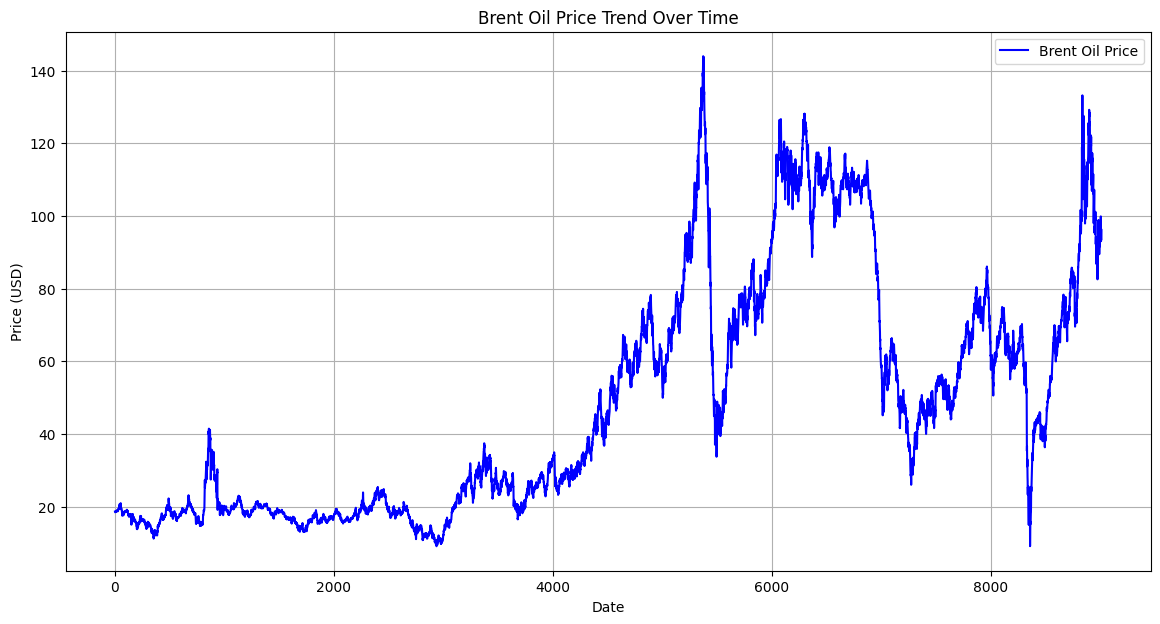

In [63]:
# initialize the EDA 
eda = EDA(oil_data_cleaned)
# perform EDA
eda.plot_price_trend()

In [71]:
# load the module of visualization
from src.visualization import BrentVisualizer
import src.visualization
reload(src.visualization)

<module 'src.visualization' from '/home/chalasimon/Documents/10academy/week 10/challenge/Oil-Price-Analysis/src/visualization.py'>

In [73]:
# initialize the visualizer
visualizer = BrentVisualizer(oil_data_cleaned)

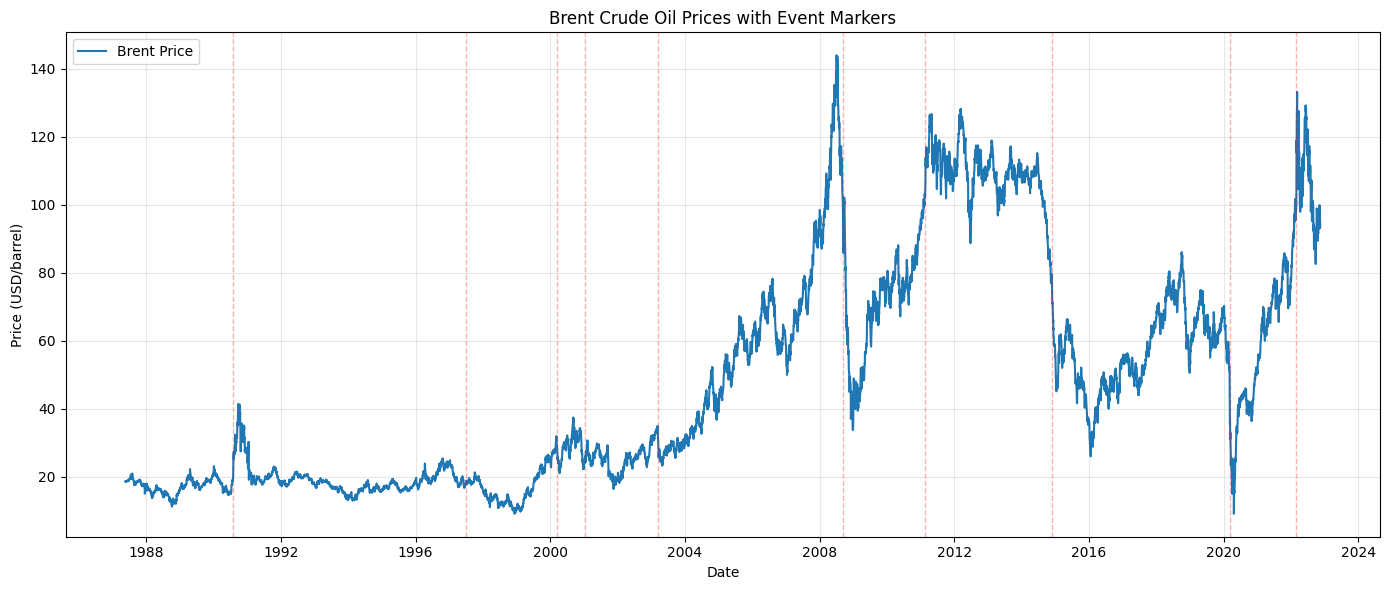

In [74]:
visualizer.plot_raw_prices(events=event_data_cleaned)